# Modeling and Evaluation Notebook

## Objectives

*   Answer business requirement 2: 
    * The client is interested to tell whether a given cell contains malaria parasite or not.


## Inputs

* inputs/malaria_dataset/cell_images/train
* inputs/malaria_dataset/cell_images/test
* inputs/malaria_dataset/cell_images/validation
* image shape embeddings

## Outputs
* Images distribution plot in train, validation, and test set
* Image augmentation
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Save model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file




## Additional Comments | Insights | Conclusions




---

---

# Import regular packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from pathlib import Path

---

# Set Working Directory

In [3]:
root_directory = str(Path(os.getcwd()).parent)+"/"
version = 1
output_directory = f"{root_directory}outputs/v{version}/"
print(root_directory)
print(output_directory)

/workspace/Mildew-Detection-Project/
/workspace/Mildew-Detection-Project/outputs/v1/


In [4]:
images_directory = f"""{root_directory}inputs/cherry-leaves-datasets/cherry-leaves/"""
healthy_image_directory = f"""{images_directory}healthy/"""
non_healthy_image_directory = f"""{images_directory}powdery_mildew/"""

print(healthy_image_directory)
print(non_healthy_image_directory)

/workspace/Mildew-Detection-Project/inputs/cherry-leaves-datasets/cherry-leaves/healthy/
/workspace/Mildew-Detection-Project/inputs/cherry-leaves-datasets/cherry-leaves/powdery_mildew/


---

## Set input directories

Set train, validation and test paths

In [5]:
train_directory = f"""{root_directory}model/data_train/"""
test_directory = f"""{root_directory}model/data_test/"""
val_directory = f"""{root_directory}model/data_validation/"""

for _dir in [train_directory, test_directory, val_directory]:
    print(_dir)

/workspace/Mildew-Detection-Project/model/data_train/
/workspace/Mildew-Detection-Project/model/data_test/
/workspace/Mildew-Detection-Project/model/data_validation/


## Set output directory

In [6]:


if "outputs" in os.listdir(root_directory) and f"v{version}" in os.listdir(
    root_directory + "outputs/"
):
    print("Old version is already available create a new version.")
    pass
else:
    os.makedirs(f"{root_directory}outputs/v{version}")

Old version is already available create a new version.


## Set labels

In [7]:

labels = os.listdir(train_directory)

print(
    f"Project Labels: {labels}"
    )

Project Labels: ['healthy', 'powdery_mildew']


## Set image shape

In [8]:
## Import saved image shape embedding
import joblib
image_shape = joblib.load(filename=f"{output_directory}/image_shape.pkl")
image_shape

(256, 256, 3)

---

# Number of images in train, test and validation data

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




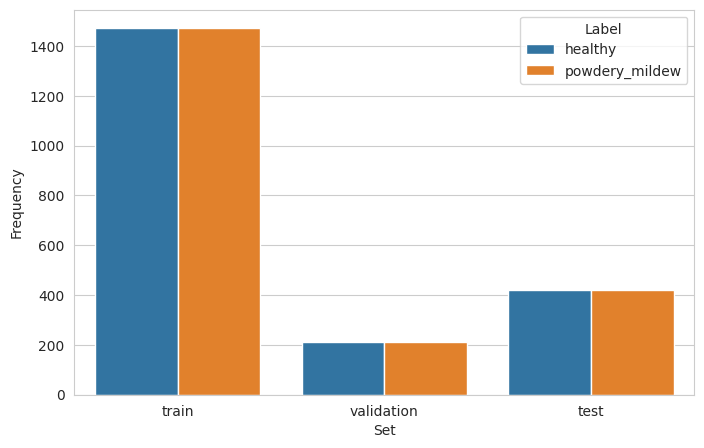

In [9]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(root_directory + "model/data_" + folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"""* {folder} - {label}: {len(os.listdir(root_directory + "model/data_" + folder + '/' + label))} images""")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{output_directory}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

---

# Image data augmentation

---

### ImageDataGenerator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

* ### Intiatize ImageDataGenerator

In [11]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

* ### Augment training image dataset

In [12]:
batch_size = 20 # Set batch size
train_set = augmented_image_data.flow_from_directory(train_directory,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment validation image dataset

In [13]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_directory,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment test image dataset

In [14]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_directory,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training image

(20, 256, 256, 3)


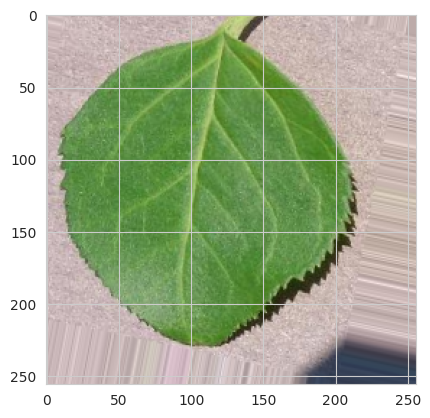

(20, 256, 256, 3)


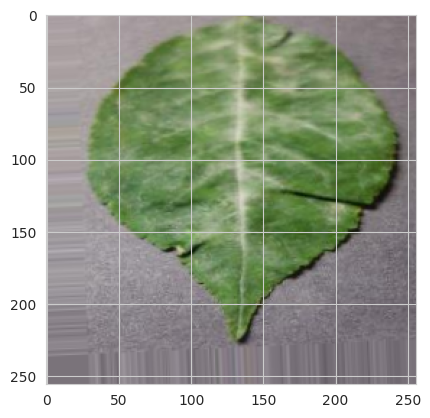

(20, 256, 256, 3)


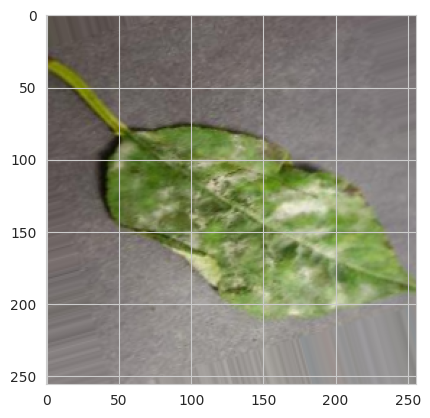

In [15]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation and test images

(20, 256, 256, 3)


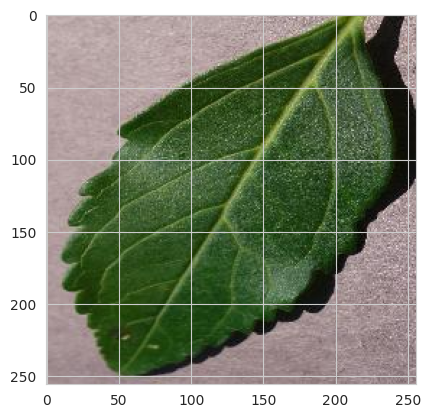

(20, 256, 256, 3)


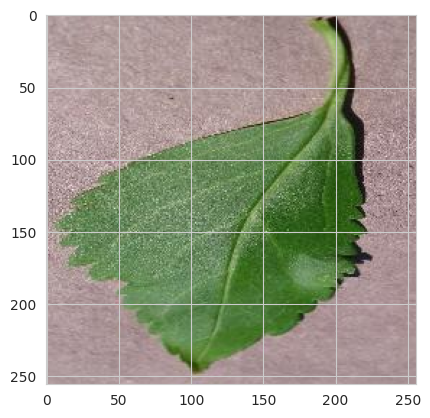

(20, 256, 256, 3)


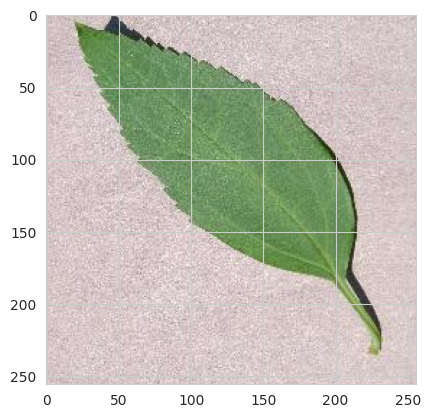

In [16]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

(20, 256, 256, 3)


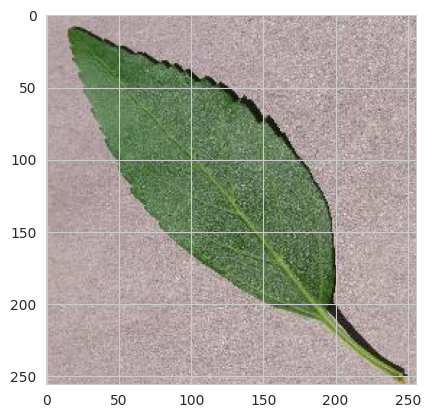

(20, 256, 256, 3)


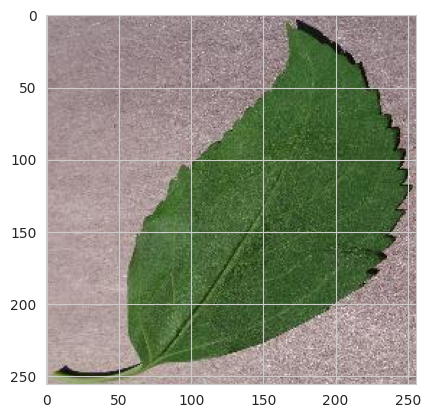

(20, 256, 256, 3)


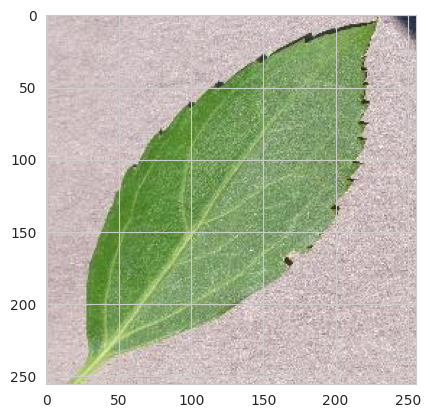

In [17]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [18]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{output_directory}/class_indices.pkl")

['/workspace/Mildew-Detection-Project/outputs/v1//class_indices.pkl']

---

# Model creation

---

## ML model

* ### Import model packages

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

* ### Model 

In [20]:

def create_tf_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

* ### Model Summary 

In [21]:
create_tf_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

2023-01-05 16:24:52.780516: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


* ### Early Stopping 

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

## Fit model for model training

In [23]:
model = create_tf_model()
model.fit(train_set,
          epochs=5,
          steps_per_epoch = len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

2023-01-05 16:26:20.333296: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
147/147 [==============================] - 218s 1s/step - loss: 0.2979 - accuracy: 0.8488 - val_loss: 0.0120 - val_accuracy: 0.9976
Epoch 2/5
147/147 [==============================] - 214s 1s/step - loss: 0.0815 - accuracy: 0.9754 - val_loss: 0.0159 - val_accuracy: 0.9952
Epoch 3/5
147/147 [==============================] - 302s 2s/step - loss: 0.0513 - accuracy: 0.9839 - val_loss: 0.0065 - val_accuracy: 0.9976
Epoch 4/5
147/147 [==============================] - 244s 2s/step - loss: 0.0287 - accuracy: 0.9918 - val_loss: 0.1687 - val_accuracy: 0.9429
Epoch 5/5
147/147 [==============================] - 234s 2s/step - loss: 0.0623 - accuracy: 0.9822 - val_loss: 0.1215 - val_accuracy: 0.9476


## Save model

In [25]:
model.save(f'{output_directory}mildew_detector_model.h5')

---

# Model Performace

---

## Model learning curve

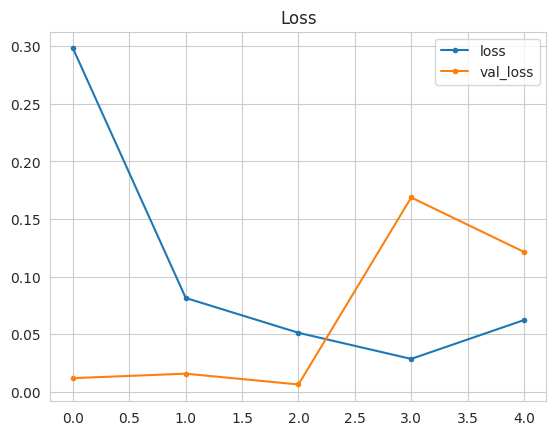

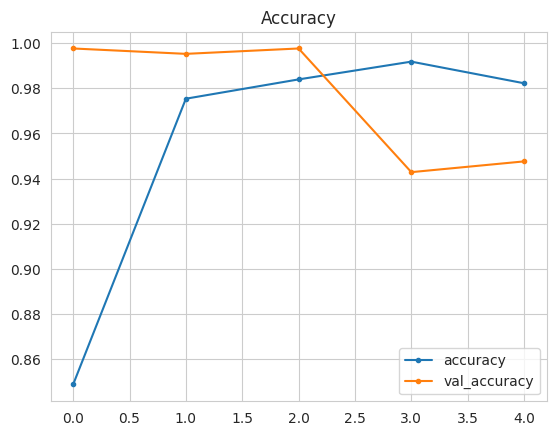

In [26]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{output_directory}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{output_directory}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation

Load saved model

In [27]:
from keras.models import load_model
model = load_model(f"{output_directory}mildew_detector_model.h5")

Evaluate model on test set

In [28]:
evaluation = model.evaluate(test_set)


43/43 [==============================] - 22s 498ms/step - loss: 0.1221 - accuracy: 0.9562


### Save evaluation pickle

In [29]:
joblib.dump(value=evaluation ,
            filename=f"{output_directory}evaluation.pkl")

['/workspace/Mildew-Detection-Project/outputs/v1/evaluation.pkl']

## Predict on new data

Load a random image as PIL

Image shape: (256, 256), Image mode: RGB


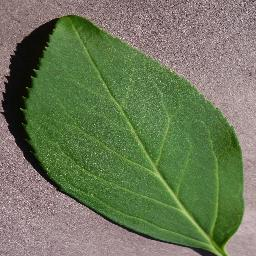

In [30]:
from tensorflow.keras.preprocessing import image

pointer = 66 
label = labels[0] # select healthy or Powdery mildew

pil_image = image.load_img(test_directory + label + '/'+ os.listdir(test_directory + label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

Convert image to array and prepare for prediction

In [31]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


Predict class probabilities

In [32]:
pred_proba = model.predict(my_image)[0,0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class =  target_map[pred_proba > 0.5]  

if pred_class == target_map[0]: pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)


0.9999992899417975
healthy


---